In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [3]:
df: pd.DataFrame = pd.read_csv('../datasets/all_df.csv', sep = ';')

In [4]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['age_rating']])
ohe_art = ohe.transform(df[['age_rating']])
ohe.get_feature_names_out()
df[ohe.get_feature_names_out()] = ohe_art

/home/nikita/Desktop/kion/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
df_b: pd.DataFrame = df[df.day_week < 4].groupby(['user_id']).agg({'kids_flg': 'first', 'Unnamed: 0': 'count', 'age_rating_0.0':'sum', 'age_rating_6.0':'sum', 'age_rating_12.0':'sum', 'age_rating_16.0':'sum', 'age_rating_18.0':'sum', 'age_rating_21.0':'sum', 'total_dur': 'sum', 'income': 'first', 'sex': 'first', 'age': 'first'})
df_n: pd.DataFrame = df[df.day_week >= 4].groupby(['user_id']).agg({'kids_flg': 'first', 'Unnamed: 0': 'count', 'age_rating_0.0':'sum', 'age_rating_6.0':'sum', 'age_rating_12.0':'sum','age_rating_16.0':'sum', 'age_rating_18.0':'sum', 'age_rating_21.0':'sum', 'total_dur': 'sum', 'income': 'first', 'sex': 'first', 'age': 'first'  })


df_b: pd.DataFrame = df_b.reset_index()
df_n: pd.DataFrame = df_n.reset_index()

df_b['off'] = 0
df_n['off'] = 1

df_b['if_deti'] = df_b['age_rating_0.0'] + df_b['age_rating_6.0'] + df_b['age_rating_12.0']
df_n['if_deti'] = df_n['age_rating_0.0'] + df_n['age_rating_6.0'] + df_n['age_rating_12.0']

df_b['deti_pct'] = df_b['if_deti'] / df_b['Unnamed: 0']
df_n['deti_pct'] = df_n['if_deti'] / df_n['Unnamed: 0']

In [6]:
df_n: pd.DataFrame = df_n[df_n['Unnamed: 0'] > 1]
df_b: pd.DataFrame = df_b[df_b['Unnamed: 0'] > 1]

In [7]:
df_b_k: pd.DataFrame = df_b[df_b.kids_flg == 1]
df_b_no_k: pd.DataFrame = df_b[df_b.kids_flg == 0]

df_n_k: pd.DataFrame = df_n[df_n.kids_flg == 1]
df_n_no_k: pd.DataFrame = df_n[df_n.kids_flg == 0]

In [8]:
k1: list[int] = df_b_k.user_id.tolist()
k2: list[int] = df_n_k.user_id.tolist()

n1: list[int] = df_b_no_k.user_id.tolist()
n2: list[int] = df_n_no_k.user_id.tolist()

<Axes: >

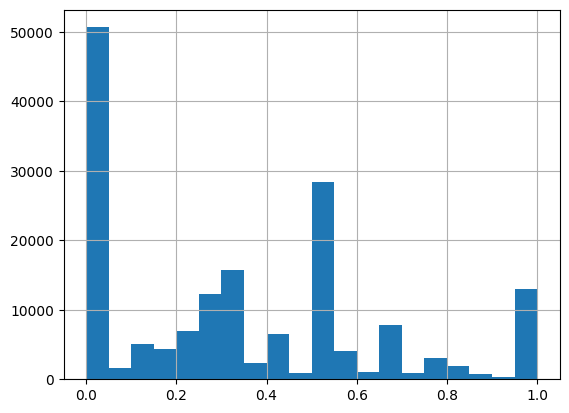

In [9]:
df_n_no_k.deti_pct.hist(bins=20)

In [10]:
df_budni_kids_w: pd.DataFrame = df_b_k[df_b_k.user_id.isin(k2)]
df_off_kids_w: pd.DataFrame = df_n_k[df_n_k.user_id.isin(k1)]

df_budni_no_kids_w: pd.DataFrame = df_b_no_k[df_b_no_k.user_id.isin(n2)]
df_off_no_kids_w: pd.DataFrame= df_n_no_k[df_n_no_k.user_id.isin(n1)]

Датасеты:
    
    df_b_k    - дети по будням(88к)
    df_b_no_k - не_дети по будням(178к)
    
    df_n_k    - дети по будням(83к)
    df_n_no_k - не_дети по будням(163к)
    
    df_budni_kids_w 
    df_off_kids_w   - будни и выходные с детьми (53к)
    
    df_budni_no_kids_w 
    df_off_no_kids_w  - будни и выходные с не_детьми (100к)

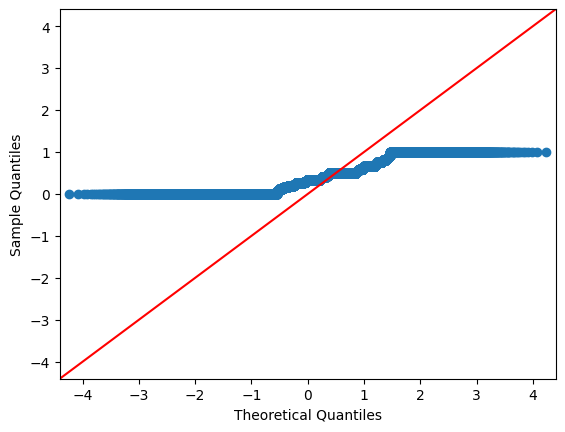

In [11]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df_b_k['deti_pct'], line='45')
plt.show()

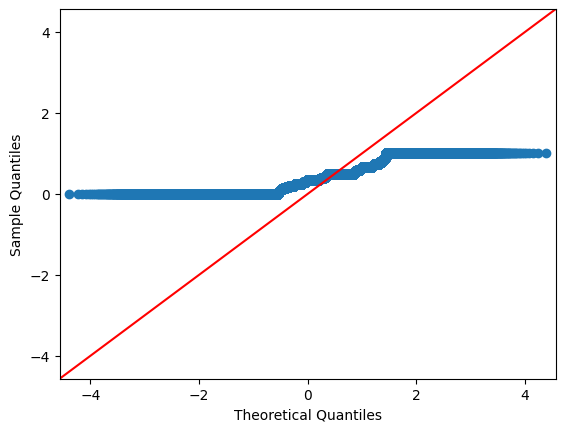

In [12]:
fig = sm.qqplot(df_b_no_k['deti_pct'], line='45')
plt.show()

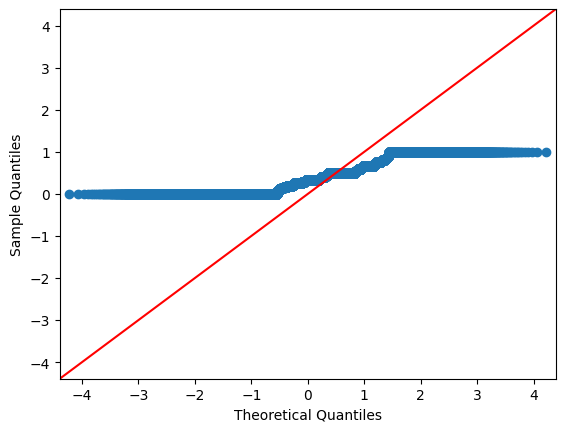

In [13]:
fig = sm.qqplot(df_n_k['deti_pct'], line='45')
plt.show()

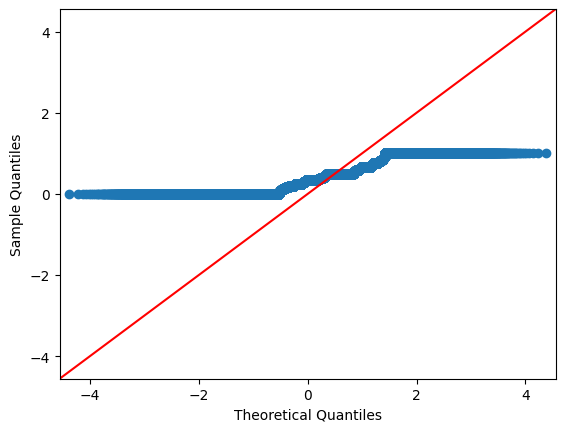

In [14]:
fig = sm.qqplot(df_n_no_k['deti_pct'], line='45')
plt.show()

<Axes: >

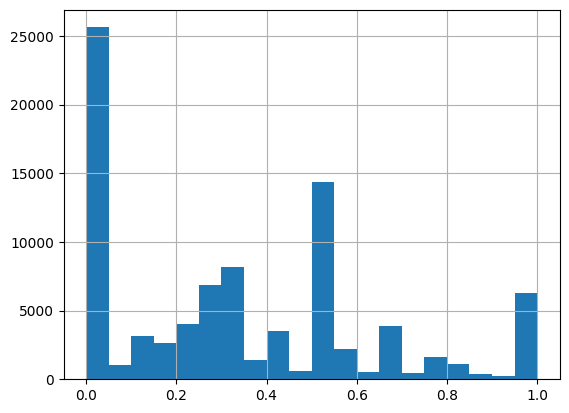

In [15]:
df_b_k.deti_pct.hist(bins=20)

# Для user_id, которые есть в обеих выборках

In [16]:
stats.wilcoxon(df_budni_kids_w['deti_pct'], df_off_kids_w['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=491054092.0, pvalue=0.0024216195820327227)

In [17]:
stats.wilcoxon(df_budni_no_kids_w['deti_pct'], df_off_no_kids_w['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=1812079008.0, pvalue=0.06449434883587332)

# Устойчивость мат.модели

Проверка гипотезы в выборках по полу

In [18]:
df_budni_kids_w_male: pd.DataFrame = df_budni_kids_w[df_budni_kids_w.sex == 'М']
df_budni_kids_w_female: pd.DataFrame = df_budni_kids_w[df_budni_kids_w.sex == 'Ж']

df_off_kids_w_male: pd.DataFrame = df_off_kids_w[df_off_kids_w.sex == 'М']
df_off_kids_w_female: pd.DataFrame = df_off_kids_w[df_off_kids_w.sex == 'Ж']

In [19]:
stats.wilcoxon(df_budni_kids_w_male['deti_pct'], df_off_kids_w_male['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=148987985.0, pvalue=0.027445851696877317)

In [20]:
stats.wilcoxon(df_budni_kids_w_female['deti_pct'], df_off_kids_w_female['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=98957213.0, pvalue=0.02094275545549586)

In [21]:
df_budni_no_kids_w_male: pd.DataFrame = df_budni_no_kids_w[df_budni_no_kids_w.sex == 'М']
df_budni_no_kids_w_female: pd.DataFrame = df_budni_no_kids_w[df_budni_no_kids_w.sex == 'Ж']

df_off_no_kids_w_male: pd.DataFrame = df_off_no_kids_w[df_off_no_kids_w.sex == 'М']
df_off_no_kids_w_female: pd.DataFrame = df_off_no_kids_w[df_off_no_kids_w.sex == 'Ж']

In [22]:
stats.wilcoxon(df_budni_no_kids_w_male['deti_pct'], df_off_no_kids_w_male['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=459261650.0, pvalue=0.11860555915109577)

In [23]:
stats.wilcoxon(df_budni_no_kids_w_female['deti_pct'], df_off_no_kids_w_female['deti_pct'], alternative = 'less')

WilcoxonResult(statistic=417688288.5, pvalue=0.18553598176183805)

# Датасеты:

    df_b_k    - дети по будням(88к)
    df_b_no_k - не_дети по будням(178к)
    
    df_n_k    - дети по будням(83к)
    df_n_no_k - не_дети по будням(163к)
    
    df_budni_kids_w 
    df_off_kids_w   - будни и выходные с детьми (53к)
    
    df_budni_no_kids_w 
    df_off_no_kids_w  - будни и выходные с не_детьми (100к)

In [24]:
print('Размеры выборок с детьми')
df_budni_kids_w_24  = df_budni_kids_w[df_budni_kids_w.age == 'age_18_24']
print(len(df_budni_kids_w_24))
df_budni_kids_w_34  = df_budni_kids_w[df_budni_kids_w.age == 'age_25_34']
print(len(df_budni_kids_w_34))
df_budni_kids_w_44  = df_budni_kids_w[df_budni_kids_w.age == 'age_35_44']
print(len(df_budni_kids_w_44))
df_budni_kids_w_54  = df_budni_kids_w[df_budni_kids_w.age == 'age_45_54']
print(len(df_budni_kids_w_54))
df_budni_kids_w_64  = df_budni_kids_w[df_budni_kids_w.age == 'age_55_64']
print(len(df_budni_kids_w_64))
df_budni_kids_w_inf = df_budni_kids_w[df_budni_kids_w.age == 'age_65_inf']
print(len(df_budni_kids_w_inf))

df_off_kids_w_24  = df_off_kids_w[df_off_kids_w.age == 'age_18_24']
df_off_kids_w_34  = df_off_kids_w[df_off_kids_w.age == 'age_25_34']
df_off_kids_w_44  = df_off_kids_w[df_off_kids_w.age == 'age_35_44']
df_off_kids_w_54  = df_off_kids_w[df_off_kids_w.age == 'age_45_54']
df_off_kids_w_64  = df_off_kids_w[df_off_kids_w.age == 'age_55_64']
df_off_kids_w_inf = df_off_kids_w[df_off_kids_w.age == 'age_65_inf']

print('Размеры выборок без детей')
df_budni_no_kids_w_24  = df_budni_no_kids_w[df_budni_no_kids_w.age == 'age_18_24']
print(len(df_budni_no_kids_w_24))
df_budni_no_kids_w_34  = df_budni_no_kids_w[df_budni_no_kids_w.age == 'age_25_34']
print(len(df_budni_no_kids_w_34))
df_budni_no_kids_w_44  = df_budni_no_kids_w[df_budni_no_kids_w.age == 'age_35_44']
print(len(df_budni_no_kids_w_44))
df_budni_no_kids_w_54  = df_budni_no_kids_w[df_budni_no_kids_w.age == 'age_45_54']
print(len(df_budni_no_kids_w_54))
df_budni_no_kids_w_64  = df_budni_no_kids_w[df_budni_no_kids_w.age == 'age_55_64']
print(len(df_budni_no_kids_w_64))
df_budni_no_kids_w_inf = df_budni_no_kids_w[df_budni_no_kids_w.age == 'age_65_inf']
print(len(df_budni_no_kids_w_inf))

df_off_no_kids_w_24  = df_off_no_kids_w[df_off_no_kids_w.age == 'age_18_24']
df_off_no_kids_w_34  = df_off_no_kids_w[df_off_no_kids_w.age == 'age_25_34']
df_off_no_kids_w_44  = df_off_no_kids_w[df_off_no_kids_w.age == 'age_35_44']
df_off_no_kids_w_54  = df_off_no_kids_w[df_off_no_kids_w.age == 'age_45_54']
df_off_no_kids_w_64  = df_off_no_kids_w[df_off_no_kids_w.age == 'age_55_64']
df_off_no_kids_w_inf = df_off_no_kids_w[df_off_no_kids_w.age == 'age_65_inf']

Размеры выборок с детьми
3633
14251
22528
9300
1874
699
Размеры выборок без детей
15814
30471
21333
16623
9102
5441


# 18-24 года

In [25]:
stats.wilcoxon(df_budni_kids_w_24['deti_pct'], df_off_kids_w_24['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=2321925.5, pvalue=0.34312678580980605)

In [26]:
stats.wilcoxon(df_budni_no_kids_w_24['deti_pct'], df_off_no_kids_w_24['deti_pct'], alternative = 'less')

WilcoxonResult(statistic=44519030.5, pvalue=0.15876542735914684)

# 25-34 года

In [27]:
stats.wilcoxon(df_budni_kids_w_34['deti_pct'], df_off_kids_w_34['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=35943859.0, pvalue=0.015530116375394825)

In [28]:
stats.wilcoxon(df_budni_no_kids_w_34['deti_pct'], df_off_no_kids_w_34['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=168383900.0, pvalue=0.5854793983969051)

# 35-44 года

In [29]:
stats.wilcoxon(df_budni_kids_w_44['deti_pct'], df_off_kids_w_44['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=91845778.0, pvalue=0.010155411713201352)

In [30]:
stats.wilcoxon(df_budni_no_kids_w_44['deti_pct'], df_off_no_kids_w_44['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=82381537.0, pvalue=0.12569202348362385)

# 45-54 года

In [31]:
stats.wilcoxon(df_budni_kids_w_54['deti_pct'], df_off_kids_w_54['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=15436446.5, pvalue=0.40250894073750815)

In [32]:
stats.wilcoxon(df_budni_no_kids_w_54['deti_pct'], df_off_no_kids_w_54['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=49478821.0, pvalue=0.20242022077338412)

# 55-64 года

In [33]:
stats.wilcoxon(df_budni_kids_w_64['deti_pct'], df_off_kids_w_64['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=654707.0, pvalue=0.44495762333252914)

In [34]:
stats.wilcoxon(df_budni_no_kids_w_64['deti_pct'], df_off_no_kids_w_64['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=14665168.5, pvalue=0.2361885017287904)

# 65 и старше

In [35]:
stats.wilcoxon(df_budni_kids_w_inf['deti_pct'], df_off_kids_w_inf['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=94027.0, pvalue=0.7995605974367517)

In [36]:
stats.wilcoxon(df_budni_no_kids_w_inf['deti_pct'], df_off_no_kids_w_inf['deti_pct'], alternative = 'less') 

WilcoxonResult(statistic=5259800.0, pvalue=0.34496380983122615)